In [111]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 1. input raw data

In [112]:
df = pd.read_csv('input_data.csv')

In [113]:
df.head(-1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620


In [114]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### 2. data preparation

In [115]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [116]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [117]:
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [118]:
strin_columns = list(df.dtypes[df.dtypes == 'object'].index)
strin_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [119]:
for col in strin_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [120]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 3. exploratory data analysis

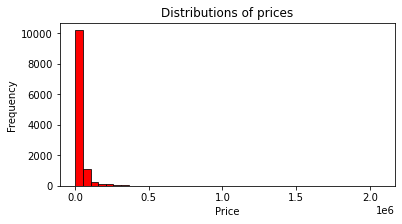

In [121]:
plt.figure(figsize=(6,3))

sns.histplot(df.msrp, bins=40, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distributions of prices')

plt.show()

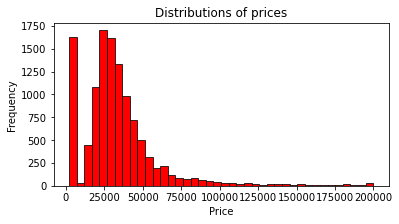

In [122]:
plt.figure(figsize=(6,3))

sns.histplot(df.msrp[df.msrp < 200_000], bins=40, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distributions of prices')

plt.show()

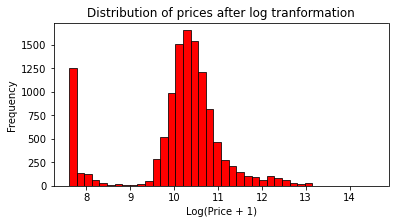

In [123]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 3))

sns.histplot(log_price, bins=40, color='red', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [124]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 4. validation framework

In [125]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# for model
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [126]:
df_train.shape

(7150, 16)

In [127]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [128]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

#for model
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### 5. linear regression

In [129]:
def train_LR(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### 6. baseline solution - integer + float

In [130]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [131]:
base = ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 
        'highway_mpg', 'city_mpg', 'popularity']

def prepare_X_none(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train = prepare_X_none(df_train)

In [132]:
w0, w = train_LR(X_train, y_train)

In [133]:
print(w0, *w, sep='\n')

-180.85289025460912
0.09432095128825616
0.0038031602426136808
0.07390134285882165
-0.023524649015603385
-0.0028578663645119143
0.011092141073898838
-4.888107716587182e-05


In [134]:
# prediction
y_pred = w0 + X_train.dot(w)

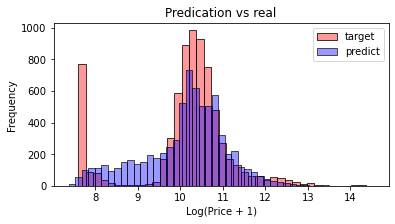

In [135]:
plt.figure(figsize=(6, 3))

sns.histplot(y_train, label='target', color='red', alpha=0.4, bins=40)
sns.histplot(y_pred, label='predict', color='blue', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predication vs real')

plt.show()

In [136]:
# accuracy
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [137]:
rmse(y_train, y_pred)

0.5171356682812327

### 7. Simple feature engineering

In [138]:
X_val = prepare_X_none(df_val)
y_pred_val = w0 + X_val.dot(w)
print(rmse(y_val, y_pred_val))
print(rmse(y_train, y_pred))

0.5168234951471155
0.5171356682812327


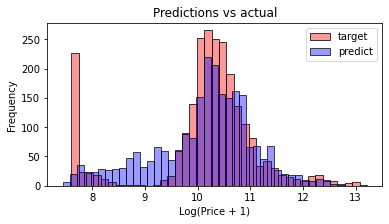

In [139]:
plt.figure(figsize=(6, 3))

sns.histplot(y_val, label='target', color='red', alpha=0.4, bins=40)
sns.histplot(y_pred_val, label='predict', color='blue', alpha=0.4, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual')

plt.show()

#### 7.1. add make

In [140]:
m = df['make'].value_counts().head(10)
m

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: make, dtype: int64

In [141]:
def preparation_X(df):
    features = base.copy()
    
    for m in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 
              'nissan', 'gmc']:
        
        feature = 'is_make_%s' % m
        df[feature] = (df['make'] == m).astype(int)
        features.append(feature)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X    

In [142]:
X_train = preparation_X(df_train)
w0, w = train_LR(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = preparation_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print('valid:', rmse(y_val, y_pred_val))


train: 0.501138048105355
valid: 0.502392354364447


#### 7.2 add engine_fuel_type

In [143]:
df['engine_fuel_type'].value_counts().head(10)

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [144]:
def preparation_X(df):
    features = base.copy()
    
    for m in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 
              'nissan', 'gmc']:
        
        feature = 'is_make_%s' % m
        df[feature] = (df['make'] == m).astype(int)
        features.append(feature)
        
        
        
    for val in ['regular_unleaded', 'premium_unleaded_(required)', 
                'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)',
               'diesel', 'electric']:
        feature = 'is_engine_type_%s' % val
        df[feature] = (df['engine_fuel_type'] == val).astype(int)
        features.append(feature)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X   

In [145]:
X_train = preparation_X(df_train)
w0, w = train_LR(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = preparation_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print('valid:', rmse(y_val, y_pred_val))

train: 0.4733076220895892
valid: 0.46840300043453403


#### 7.3 add transmission_type

In [146]:
df['transmission_type'].value_counts().head(10)

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [147]:
def preparation_X(df):
    features = base.copy()
    
    # make
    for m in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 
              'nissan', 'gmc']:
        
        feature = 'is_make_%s' % m
        df[feature] = (df['make'] == m).astype(int)
        features.append(feature)
        
    # engine type    
    for val in ['regular_unleaded', 'premium_unleaded_(required)', 
                'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)',
               'diesel', 'electric']:
        feature = 'is_engine_type_%s' % val
        df[feature] = (df['engine_fuel_type'] == val).astype(int)
        features.append(feature)
    
    # transmission type
    for val in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % val
        df[feature] = (df['transmission_type'] == val).astype(int)
        features.append(feature)
        
    
        
    # none = 0
    df_num = df[features]
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X   

In [148]:
X_train = preparation_X(df_train)
w0, w = train_LR(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = preparation_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print('valid:', rmse(y_val, y_pred_val))

train: 0.469169404660848
valid: 0.46434941107925687


#### 7.4 add drieven whell, market category, size, style

In [149]:
print('driven_wheels:\n', df['driven_wheels'].value_counts().head())
print('market_category:\n', df['market_category'].value_counts().head())
print('vehicle_size:\n', df['vehicle_size'].value_counts().head())
print('vehicle_style:\n', df['vehicle_style'].value_counts().head())


driven_wheels:
 front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64
market_category:
 crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64
vehicle_size:
 compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64
vehicle_style:
 sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64


In [150]:
def preparation_X(df):
    df = df.copy()
    
    features = base.copy()
    
    # make
    for m in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge', 
              'nissan', 'gmc']:
        
        feature = 'is_make_%s' % m
        df[feature] = (df['make'] == m).astype(int)
        features.append(feature)
        
    # engine type    
    for val in ['regular_unleaded', 'premium_unleaded_(required)', 
                'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)',
               'diesel', 'electric']:
        feature = 'is_engine_type_%s' % val
        df[feature] = (df['engine_fuel_type'] == val).astype(int)
        features.append(feature)
    
    # transmission type
    for val in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % val
        df[feature] = (df['transmission_type'] == val).astype(int)
        features.append(feature)
    
    # driven_wheels
    for val in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive',
              'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % val
        df[feature] = (df['driven_wheels'] == val).astype(int)
        features.append(feature)
        
    # market_category
    for val in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance',
                'hatchback']:
        feature = 'is_mc_%s' % val
        df[feature] = (df['market_category'] == val).astype(int)
        features.append(feature)

    # vehicle_size
    for val in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % val
        df[feature] = (df['vehicle_size'] == val).astype(int)
        features.append(feature)
    
    # vehicle_style
    for val in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % val
        df[feature] = (df['vehicle_style'] == val).astype(int)
        features.append(feature)

        
    # none = 0
    df_num = df[features]
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X   

In [151]:
X_train = preparation_X(df_train)
w0, w = train_LR(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = preparation_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print('valid:', rmse(y_val, y_pred_val))

train: 421.82132142883523
valid: 406.70749279505475


### 8. Regularization

In [152]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [153]:
X_train = preparation_X(df_train)

In [154]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w0, w[13], w[21]))

    0, -1307802839824999.00, 41.07, 4208.32
0.001, -116.57, -0.07, 0.36
 0.01, -101.81, -0.06, 0.31
  0.1, -44.94, -0.01, 0.13
    1, -6.85, 0.02, 0.04
   10, -0.74, 0.02, -0.02


In [155]:
X_train = preparation_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = preparation_X(df_val)
y_pred_val = w0 + X_val.dot(w)
print('val', rmse(y_val, y_pred_val))

train 0.46231691120156065
val 0.45984394192605366


In [156]:
X_train = preparation_X(df_train)
X_val = preparation_X(df_val)
X_test = preparation_X(df_test)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred_val = w0 + X_val.dot(w)
    y_pred_test = w0 + X_test.dot(w)
    print('%3s' %r, round(rmse(y_val, y_pred_val), 3), 
                    round(rmse(y_test, y_pred_test), 3))

1e-06 0.454 0.45
0.0001 0.454 0.45
0.001 0.454 0.45
0.01 0.46 0.454
0.1 0.534 0.521
  1 0.619 0.601
  5 0.633 0.614
 10 0.635 0.616
 20 0.637 0.618
100 0.642 0.621


### 9. using model

In [157]:
indx = 0
ad = df_test.iloc[indx].to_dict()
ad

{'make': 'gmc',
 'model': 'vandura',
 'year': 1994,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 165.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 3.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'cargo_van',
 'highway_mpg': 20,
 'city_mpg': 15,
 'popularity': 549}

In [158]:
X_test = preparation_X(pd.DataFrame([ad]))[0]
y_pred = w0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

9611.369080631248